# Linear regression with Scikit-Learn
Ordinary least squares linear regression for 1-dimensional data and targets.

# Goal
Given samples $\{(x_1, y_1), \dots, (x_N, y_N)\}$, to find  $m$ and $b$ minimizing
$$\sum_{i=1}^N\left(y_i - f(x_i)\right)^2$$
where
$$f(x) = b+mx\,.$$
It turns out that the parameters $m$ and $b$ can be computed analytically.  This is done in `Scikit-Learn`.

---
tags: tutorial, linear regression, sklearn

# Imports

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
%matplotlib inline

# Helper functions

In [2]:
def mse(preds, targs):
    return ((preds - targs)**2).sum()

# Data

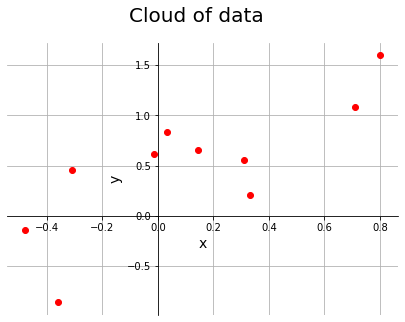

In [3]:
N = 10
x = (-1 + 2*np.random.rand(N)).reshape(-1, 1)
sigma = .5
h = sigma*np.random.randn(N).reshape(-1, 1)
targs = .5 + x + h

fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(x, targs, linestyle='', marker='o', color='r', label='data');

ax.spines['bottom'].set_position('zero')    
ax.spines['top'].set_visible(False)
ax.spines['left'].set_position('zero')
ax.spines['right'].set_visible(False)
ax.grid();
ax.set_xlabel("x", fontsize=14)
ax.set_ylabel("y", fontsize=14)
fig.suptitle("Cloud of data", fontsize=20);

# Linear regression

In [6]:
linreg = LinearRegression()

linreg.fit(x, targs)

preds = linreg.predict(x)
loss = mse(targs, preds)
print(f"{'Slope':<10} m={linreg.coef_[0,0]:.4f}")
print(f"{'Intercept':<10} b={linreg.intercept_[0]:.4f}")
print(f"{'Loss':<10} L={loss:.4f}")

Slope      m=1.2189
Intercept  b=0.3566
Loss       L=1.5577


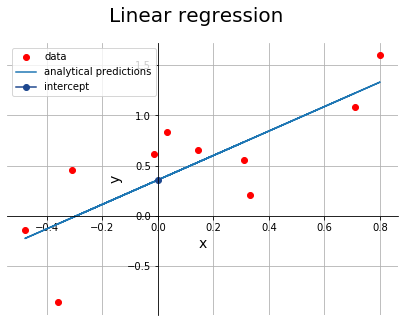

In [5]:
fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(x, targs, linestyle='', marker='o', color='r', label='data');
ax.plot(x, preds, label='analytical predictions')

ax.plot(0, linreg.intercept_, marker='o', color='xkcd:cobalt', label='intercept')

ax.spines['bottom'].set_position('zero')    
ax.spines['top'].set_visible(False)
ax.spines['left'].set_position('zero')
ax.spines['right'].set_visible(False)
ax.grid();
ax.set_xlabel("x", fontsize=14)
ax.set_ylabel("y", fontsize=14)
ax.legend()
fig.suptitle("Linear regression", fontsize=20);